# Graph Theory Fundamentals with NetworkX

This notebook is a practical work to core ideas from graph theory using **NetworkX** in Python.

It contains:

- create and manipulate graphs (undirected and directed);
- visualise graphs;
- compute basic properties (degrees, paths, connected components);
- compute and interpret simple centrality measures;
- load a graph from a text file.

Throughout, we use the standard notation **$G = (V, E)$**, where $V$ is the set of nodes (vertices) and $E$ is the set of edges.


----

## 1. Environment Setup (Google Colab or vs code)




In [ ]:
# Install required libraries 
#!pip install -q networkx matplotlib


### Imports

We import NetworkX for graph creation/analysis and Matplotlib for plotting.


In [57]:
import networkx as nx
import matplotlib.pyplot as plt


## 2. Part 1 — Creating a Simple Undirected Graph

We create a small **undirected** graph:

- Nodes: $V = \{1,2,3,4,5,6,7,8\}$
- Edges: $E = \{(1,2),(2,3),(1,4),(2,5),(5,6),(6,7),(4,8)\}$

In an undirected graph, an edge $(u,v)$ has no direction (it connects $u$ and $v$ symmetrically).


In [58]:
# Create an undirected graph G
G = nx.Graph()

# Add nodes and edges
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])
G.add_edges_from([(1,2),(2,3),(1,4),(2,5),(5,6),(6,7),(4,8)])

# Display basic information
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Nodes: [1, 2, 3, 4, 5, 6, 7, 8]
Edges: [(1, 2), (1, 4), (2, 3), (2, 5), (4, 8), (5, 6), (6, 7)]
Number of nodes: 8
Number of edges: 7


The graph have 8 nodes and 7 edges. If we add edge (1,3) we will create a cycle on the graph.


## 3. Part 2 — Visualising the Graph

NetworkX provides simple drawing helpers. Different layout algorithms place nodes at different coordinates, so drawings may vary even for the same graph.


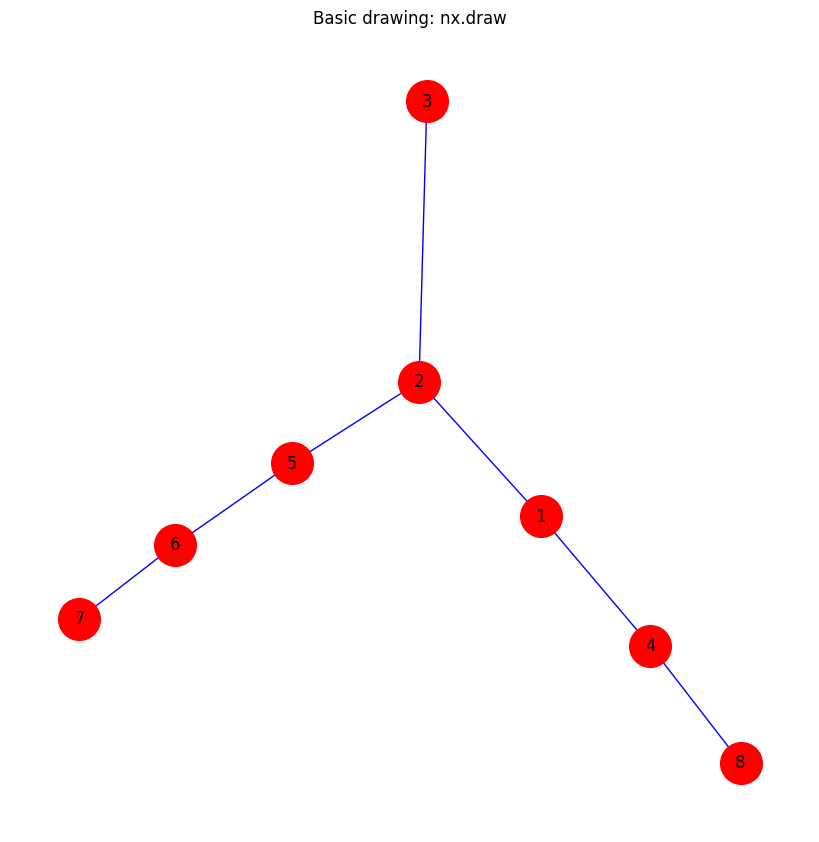

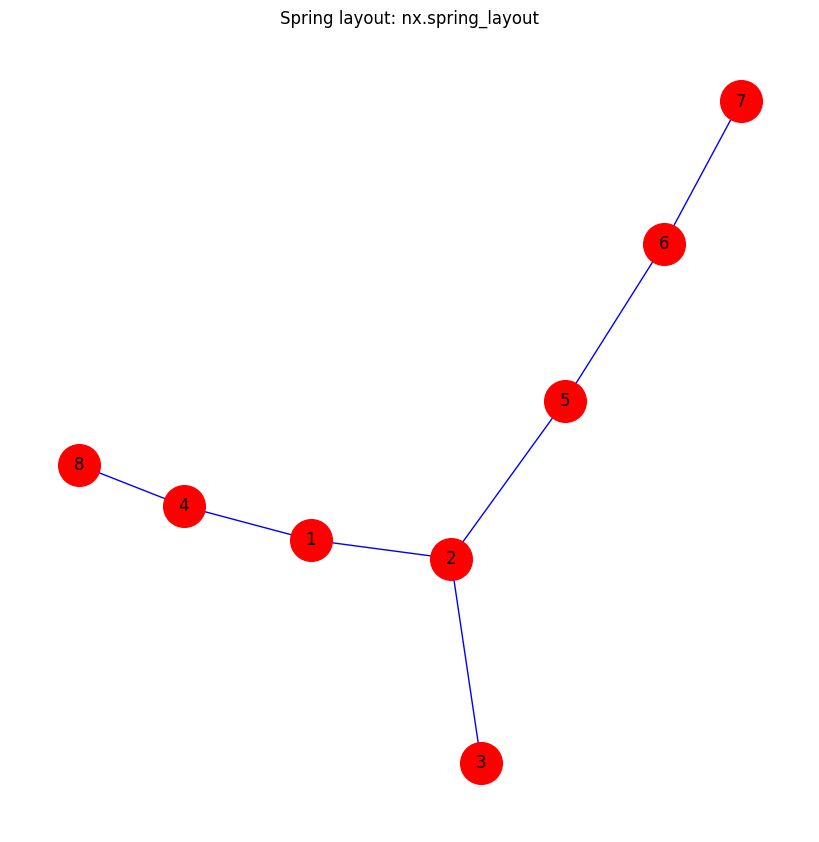

In [59]:
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_size=900, node_color="red", edge_color="blue")
plt.title("Basic drawing: nx.draw")
plt.show()

# Alternative 
pos = nx.spring_layout(G, seed=1)
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=900, node_color="red", edge_color="blue")
plt.title("Spring layout: nx.spring_layout")
plt.show()


The same graph can have different drawings because its mathematical definition depends only on (nodes and edges) the connections between nodes  and not on their position on the plane. While nx.draw uses a default placement that is often random, nx.spring_layout calculates the coordinates according to a physical force model to improve readability. Seed = 1 force the algoritm to always start on the same way.

## 4. Part 3 — Directed Graphs

A **directed** graph (digraph) has edges with direction, written $(u \rightarrow v)$.

We create a directed graph $DG$ with edges:

- $A \rightarrow B$
- $B \rightarrow C$
- $B \rightarrow D$
- $C \rightarrow E$
- $D \rightarrow F$


In [60]:
# Create a directed graph
DG = nx.DiGraph()
DG.add_edge("A", "B")
DG.add_edge("B", "C")
DG.add_edge("C", "E")
DG.add_edge("B", "D")
DG.add_edge("D", "F")


print("Directed edges:", list(DG.edges()))


Directed edges: [('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('D', 'F')]


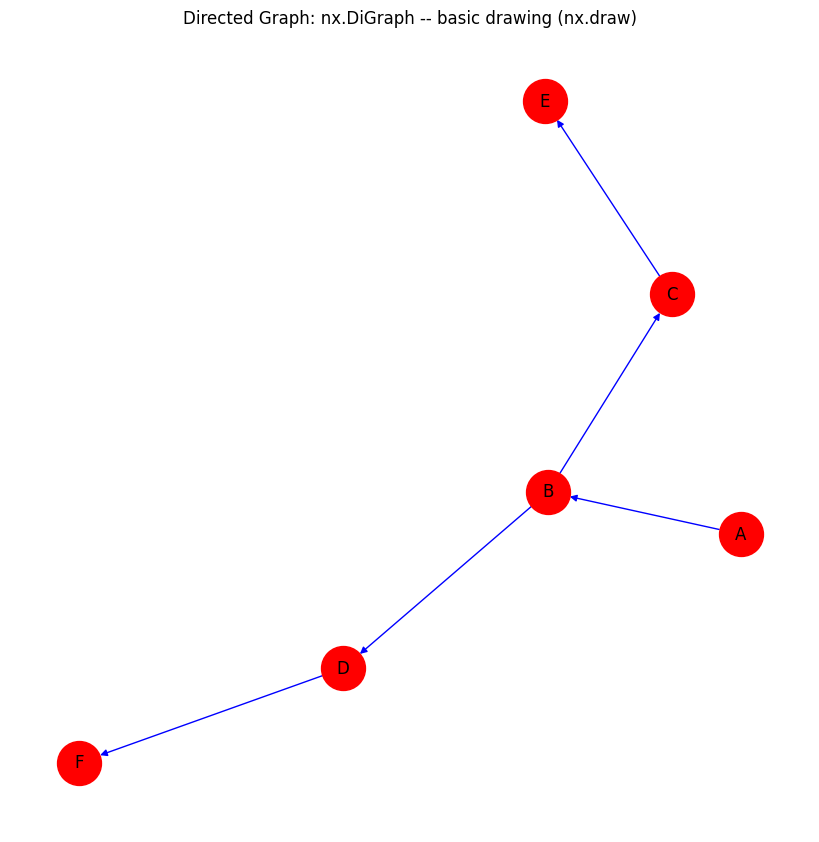

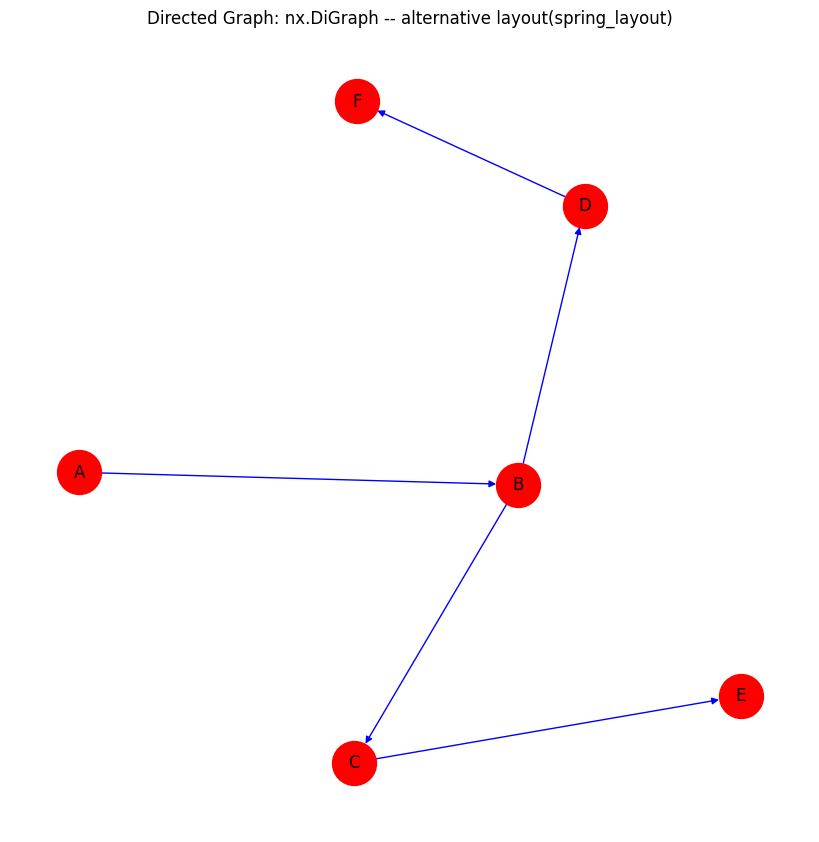

In [61]:
plt.figure(figsize=(8, 8))
nx.draw(DG, with_labels=True, node_size=1000, arrows=True, node_color="red", edge_color="blue")
plt.title("Directed Graph: nx.DiGraph -- basic drawing (nx.draw)")
plt.show()

pos = nx.spring_layout(DG, seed=1)
plt.figure(figsize=(8, 8))
nx.draw(DG, pos, with_labels=True, node_size=1000, arrows=True, node_color="red", edge_color="blue")
plt.title("Directed Graph: nx.DiGraph -- alternative layout(spring_layout)")
plt.show()

There is no directed path from $C$ to $A$. In an undirected graph, the edge is a simple reciprocal connection (so there is a bidirectional link), whereas in a directed graph, the edge has a direction from a source node to a target node (a unidirectional link represented graphically by edge in the form of an arrow).

## 5. Part 4 — Degrees and Shortest Paths

For an undirected graph, the **degree** of a node is the number of edges incident to it.

We also compute the shortest path between nodes $1$ and $3$ in $G$.

> Note: to test how adding edge $(1,3)$ changes distances without permanently modifying $G$, we use a copy of the graph.


In [62]:
# Degrees
degrees = dict(G.degree())
print("Degrees:", degrees)

# Shortest path (in terms of number of edges)
path_1_to_3 = nx.shortest_path(G, source=1, target=3)
dist_1_to_3 = nx.shortest_path_length(G, source=1, target=3)

print("Shortest path from 1 to 3:", path_1_to_3)
print("Distance from 1 to 3:", dist_1_to_3)

# Add edge (1,3) on a copy and recompute
G_with_extra_edge = G.copy()
G_with_extra_edge.add_edge(1, 3)

new_path = nx.shortest_path(G_with_extra_edge, source=1, target=3)
new_dist = nx.shortest_path_length(G_with_extra_edge, source=1, target=3)

print("\nAfter adding edge (1,3):")
print("New shortest path from 1 to 3:", new_path)
print("New distance from 1 to 3:", new_dist)


Degrees: {1: 2, 2: 3, 3: 1, 4: 2, 5: 2, 6: 2, 7: 1, 8: 1}
Shortest path from 1 to 3: [1, 2, 3]
Distance from 1 to 3: 2

After adding edge (1,3):
New shortest path from 1 to 3: [1, 3]
New distance from 1 to 3: 1


The distance between nodes $1$ and $3$ is currently 2 (via node $2$), but it's reduced to 1 if the  edge $(1, 3)$ is added


## 6. Part 5 — Centrality Measures

Centrality measures quantify “importance” of nodes in a network.

We compute:

- **Betweenness centrality**: how often a node lies on shortest paths between other nodes.
- **Closeness centrality**: how close a node is (on average) to all others.
- **Eigenvector centrality**: a node is important if it is connected to other important nodes.

For small graphs, printing rounded values makes results easier to read.


In [63]:
# Centrality measures for G
bet = nx.betweenness_centrality(G)
clo = nx.closeness_centrality(G)
eig = nx.eigenvector_centrality(G)  # small graph should converge quickly

def round_dict(d, ndp=3):
    return {k: round(v, ndp) for k, v in d.items()}

print("Betweenness:", round_dict(bet))
print("Closeness:", round_dict(clo))
print("Eigenvector:", round_dict(eig))


Betweenness: {1: 0.476, 2: 0.714, 3: 0.0, 4: 0.286, 5: 0.476, 6: 0.286, 7: 0.0, 8: 0.0}
Closeness: {1: 0.467, 2: 0.538, 3: 0.368, 4: 0.368, 5: 0.467, 6: 0.368, 7: 0.28, 8: 0.28}
Eigenvector: {1: 0.433, 2: 0.577, 3: 0.289, 4: 0.289, 5: 0.433, 6: 0.289, 7: 0.144, 8: 0.144}


- **Betweenness**: node 2 has the highest value ($0.714$), which means it lies on the greatest number of shortest paths between other nodes ;
- **Closeness**: it also has the maximum value ($0.538$), indicating that it is, on average, the closest to all other nodes in the network ;
- **Eigenvector**: with a score of $0.577$, it has the most significant influence, as it is connected to other well-connected nodes.

so node 2 appears the most central in G

Betweenness centrality is particularly relevant in transport or telecommunications networks, as it helps identify most important nodes that serve as mandatory passage points.


## 7. Part 6 — Cliques and Connected Components

- A **clique** is a set of nodes where every pair of nodes is connected by an edge (a fully connected subgraph).
- A **connected component** is a maximal set of nodes where each node is reachable from every other node via some path.


In [64]:
# Cliques 
cliques = list(nx.find_cliques(G))
print("Cliques:", cliques)

# Connected components
components = list(nx.connected_components(G))
print("Connected components:", components)

Cliques: [[2, 1], [2, 3], [2, 5], [4, 8], [4, 1], [6, 5], [6, 7]]
Connected components: [{1, 2, 3, 4, 5, 6, 7, 8}]


## 8. Part 7 — Loading a Graph from a File

A common way to store a graph is as an **edge list**: each line contains two node labels (one edge).

We will create a file called `reseausimple.txt` where each line is an edge:

- `A B`
- `B C`
- `C D`


In [65]:
%%writefile reseausimple.txt
A B
B C
C D


Overwriting reseausimple.txt


**Questions (Part 7 — file creation)**  



Graph with 4 nodes and 3 edges
Number of nodes: 4
Number of edges: 3
Is the graph connected? True
Closeness centrality: {'A': 0.5, 'B': 0.75, 'C': 0.75, 'D': 0.5}
Betweenness centrality: {'A': 0.0, 'B': 0.667, 'C': 0.667, 'D': 0.0}
Degree centrality: {'A': 0.333, 'B': 0.667, 'C': 0.667, 'D': 0.333}


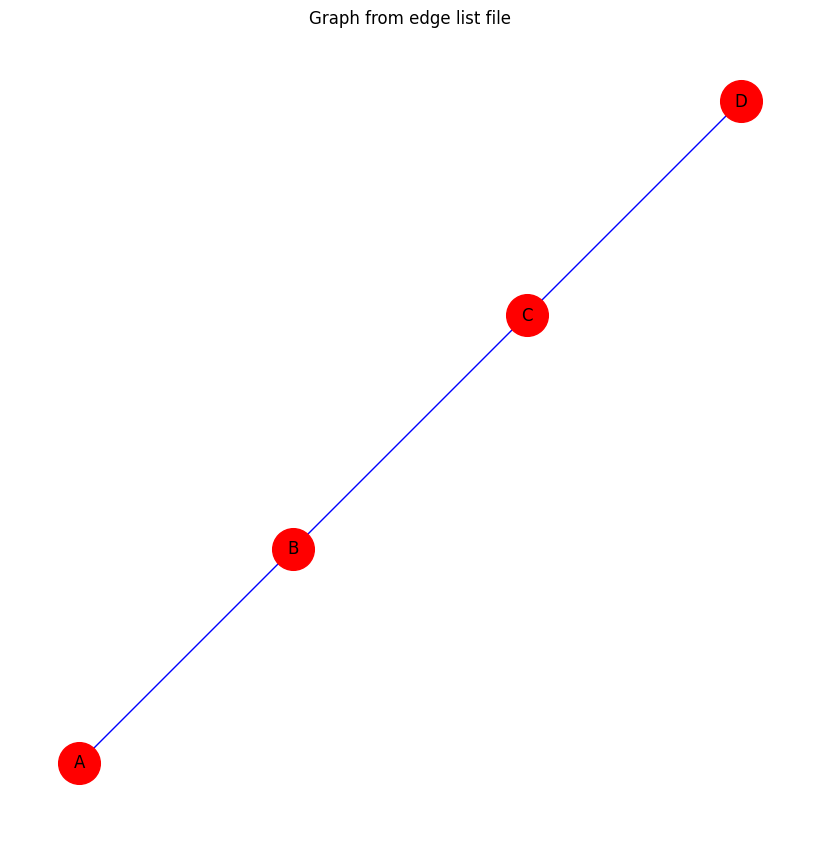

In [84]:
# Load the graph from the edge list file
G_file = nx.read_edgelist("reseausimple.txt", nodetype=str)

print(G_file)  
print("Number of nodes:", G_file.number_of_nodes())
print("Number of edges:", G_file.number_of_edges())

print("Is the graph connected?", nx.is_connected(G_file))

# A quick centrality check (optional, for interpretation)
print("Closeness centrality:", {k: round(v, 3) for k, v in nx.closeness_centrality(G_file).items()})
print("Betweenness centrality:", {k: round(v, 3) for k, v in nx.betweenness_centrality(G_file).items()})
print("Degree centrality:", {k: round(v, 3) for k, v in nx.degree_centrality(G_file).items()})



# Visualize the graph
plt.figure(figsize=(8, 8))
nx.draw(G_file, with_labels=True, node_size=900, node_color="red", edge_color="blue")
plt.title("Graph from edge list file")
plt.show()

---  



# Application on a real Problem

***The objective of this use case is to assess the structural vulnerability of the global financial system by mapping the interdependencies between ten major banking institutions, including JPMorgan Chase, HSBC and BNP Paribas. In this analysis, we use daily asset returns rather than raw stock prices, as returns provide a stationary and standardised measure of performance. This approach ensures that all banks are compared on an equivalent scale, regardless of the nominal price of their shares.***

In [67]:
#!pip install yfinance networkx matplotlib

In [68]:
import yfinance as yf
import pandas as pd
import numpy as np

### Data

***The data is extracted via the yfinance API, which provides real stock histories from the Yahoo Finance platform. It includes the daily adjusted closing prices of certain global banking institutions for the period from 1 January 2015 to 1 January 2026.***

In [69]:
banks = ["JPM", "BAC", "WFC", "C", "HSBC", "RY", "BNP.PA", "GLE.PA", "DB", "UBS"]
data = yf.download(banks, start="2015-01-01", end="2026-01-01", auto_adjust=True)['Close']

[*********************100%***********************]  10 of 10 completed


### Returns and correlation Matrix

In [87]:
returns = data.pct_change().dropna()

***A p-value below the 0.01 (or 1%) threshold indicates that we reject the null hypothesis of stationarity with very high statistical certainty, making the data unsuitable for reliable correlation analysis. Stationarity is important in this study as it ensures that the observed relationships between banks are stable over time and do not result from temporary trends or spurious correlations that would distort the assessment of systemic risk.***

In [71]:
from statsmodels.tsa.stattools import kpss
import warnings
warnings.filterwarnings('ignore')

def apply_kpss_to_returns(df_returns):
    results = []
    for bank in df_returns.columns:
        statistic, p_value, n_lags, critical_values = kpss(df_returns[bank], regression='c') 
        is_stationary = "Stationary" if p_value >= 0.01 else "Non-Stationary"
        results.append({
            "Bank": bank,
            "KPSS Statistic": round(statistic, 4),
            "p-value": round(p_value, 4),
            "Status": is_stationary
        })
    summary_table = pd.DataFrame(results)
    return summary_table


kpss_summary = apply_kpss_to_returns(returns)
print(kpss_summary)

     Bank  KPSS Statistic  p-value      Status
0     BAC          0.0427   0.1000  Stationary
1  BNP.PA          0.0739   0.1000  Stationary
2       C          0.1426   0.1000  Stationary
3      DB          0.4740   0.0475  Stationary
4  GLE.PA          0.2441   0.1000  Stationary
5    HSBC          0.4392   0.0602  Stationary
6     JPM          0.0733   0.1000  Stationary
7      RY          0.1619   0.1000  Stationary
8     UBS          0.2733   0.1000  Stationary
9     WFC          0.2012   0.1000  Stationary


***Systemic risk is explained through these returns by analysing their co-movement within a correlation matrix, which serves as the foundation for our network graph. High positive correlations between banks represent potential channels of contagion, indicating that a negative performance shock in one institution is likely to trigger a simultaneous decline in others. By identifying "hub" nodes with high centrality scores in this correlation network, we can identify specific banks whose financial distress would pose a catastrophic problem to the entire system, thereby providing a quantifiable measure of systemic instability.***

In [72]:
corr_matrix = returns.corr()
corr_matrix

Ticker,BAC,BNP.PA,C,DB,GLE.PA,HSBC,JPM,RY,UBS,WFC
Ticker,,,,,,,,,,
BAC,1.000000,0.551086,0.870310,0.606553,0.544057,0.596061,0.884615,0.656803,0.650241,0.832982
BNP.PA,0.551086,1.000000,0.547175,0.645732,0.863895,0.570597,0.545197,0.489200,0.593494,0.495329
C,0.870310,0.547175,1.000000,0.608315,0.546809,0.593381,0.856058,0.666822,0.659817,0.798349
DB,0.606553,0.645732,0.608315,1.000000,0.647117,0.606450,0.598659,0.541835,0.709841,0.550192
GLE.PA,0.544057,0.863895,0.546809,0.647117,1.000000,0.571569,0.545678,0.480914,0.585562,0.502612
HSBC,0.596061,0.570597,0.593381,0.606450,0.571569,1.000000,0.596112,0.550955,0.604818,0.554547
JPM,0.884615,0.545197,0.856058,0.598659,0.545678,0.596112,1.000000,0.666911,0.638332,0.808495
RY,0.656803,0.489200,0.666822,0.541835,0.480914,0.550955,0.666911,1.000000,0.598284,0.612006
UBS,0.650241,0.593494,0.659817,0.709841,0.585562,0.604818,0.638332,0.598284,1.000000,0.602289


***The analysis of the correlation matrix identifies several high-intensity dependencies that can define the network's architecture. Most notably, a dominant North American cluster is evident, where JPMorgan Chase (JPM), Bank of America (BAC), and Citigroup (C) exhibit correlation coefficients frequently exceeding 0.80. Similarly, within the European erea, the correlation between BNP Paribas (BNP.PA) and Société Générale (GLE.PA) represents one of the strongest link in the matrix (exceeding 0.85). These specific examples underscore the concentration of systemic risk within geographic 'hubs', where the collapse of one institution would likely trigger an instantaneous and unavoidable domino effect across its most closely correlated peers.***

### Graph

In [73]:
G_finance = nx.Graph()
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
            G_finance.add_edge(corr_matrix.columns[i], 
                               corr_matrix.columns[j], 
                               weight=corr_matrix.iloc[i, j])

***Visualisation graph***

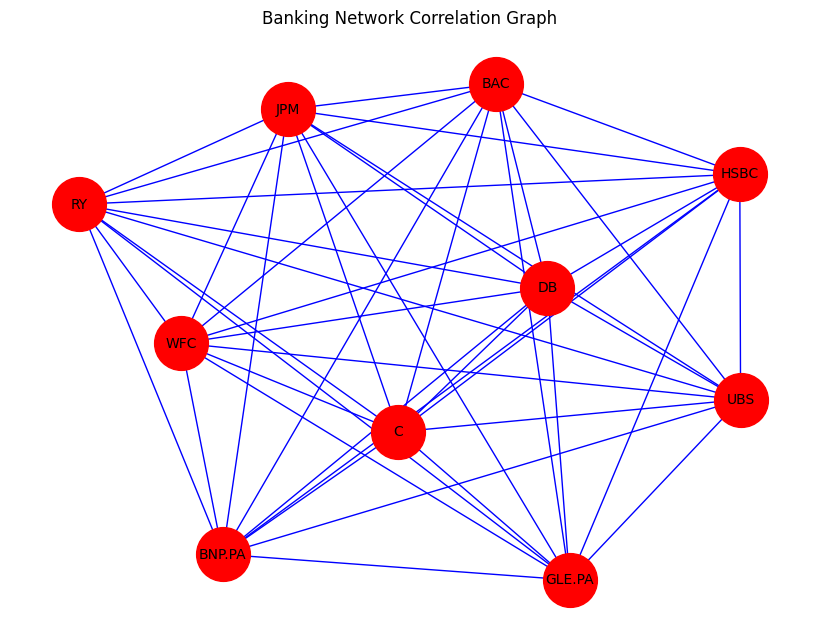

In [74]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_finance, seed=1)
nx.draw(G_finance, pos, with_labels=True, node_color='red', edge_color='blue',
        node_size=1500, font_size=10)
plt.title("Banking Network Correlation Graph")
plt.show()

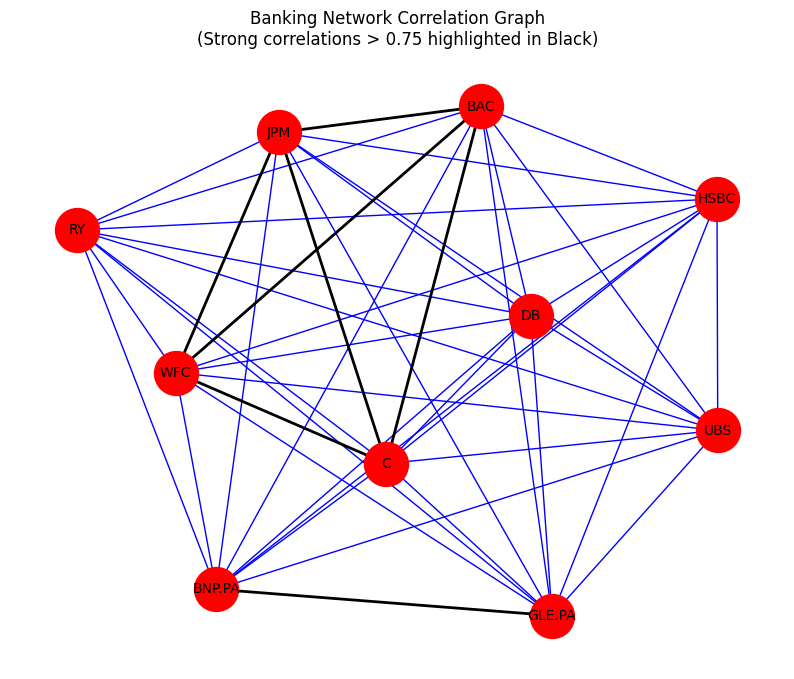

In [75]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_finance, seed=1)
#separation of edges by weight
strong_edges = [(u, v) for (u, v, d) in G_finance.edges(data=True) if d['weight'] > 0.75]
normal_edges = [(u, v) for (u, v, d) in G_finance.edges(data=True) if d['weight'] <= 0.75]
#draw nodes nd edges
nx.draw_networkx_nodes(G_finance, pos, node_color='red', node_size=1000)
nx.draw_networkx_edges(G_finance, pos, edgelist=normal_edges, edge_color='blue', width=1)
nx.draw_networkx_edges(G_finance, pos, edgelist=strong_edges, edge_color='black', width=2)
# draw labels
nx.draw_networkx_labels(G_finance, pos, font_size=10)
plt.title("Banking Network Correlation Graph\n(Strong correlations > 0.75 highlighted in Black)")
plt.axis('off')
plt.show()

***The reading of the graph suggests a natural grouping of banks by geographical clusters, revealing a high density of black edges between American banks (JPM, BAC, C, WFc) and between French banks (BNP.PA, GLE.PA). These black edges represent correlations above 0.75, indicating priority contagion channels where a volatility shock would propagate almost instantaneously in a significant way.***

***Nodes acting as bridges, such as HSBC, are located at the intersection of continental clusters with blue edges, highlighting their important role in the transmission of cross-border risk. Finally, the presence of these very strong black links indicates that the network is not uniform but structured around highly dependent cliques, suggesting that a local crisis in one of these hubs could quickly turn into a global systemic crisis***

***Connected component and cliques***

In [76]:
components = list(nx.connected_components(G_finance))
print("Connected components:", components)

Connected components: [{'C', 'BAC', 'HSBC', 'RY', 'WFC', 'GLE.PA', 'BNP.PA', 'DB', 'UBS', 'JPM'}]


***There is a single component comprising all 10 institutions, showing that the banking network is completely interconnected. No bank is isolated, and there is a path between every pair of banks. From a regulatory perspective, this indicates a notable systemic vulnerability, as a shock in one bank can propagate throughout the entire network.***

In [77]:
# Cliques 
cliques = list(nx.find_cliques(G_finance))
print("Cliques:", cliques)

Cliques: [['C', 'RY', 'BAC', 'HSBC', 'WFC', 'GLE.PA', 'DB', 'BNP.PA', 'UBS', 'JPM']]


***The presence of a maximal clique including all 10 banks means that the network is (almost) complete. Each institution is strongly correlated with all the others, indicating maximum systemic density.***

### Centrality Measures

In [85]:
betweenness = nx.betweenness_centrality(G_finance)
closeness = nx.closeness_centrality(G_finance)
eigenvector = nx.eigenvector_centrality(G_finance)
degrees = nx.degree_centrality(G_finance)

cty_df = pd.DataFrame({
    'Betweenness': betweenness,
    'Closeness': closeness,
    'Eigenvector': eigenvector,
    'Degree': degrees
})
cty_df = cty_df.sort_values(by='Betweenness', ascending=False)
cty_df

,Betweenness,Closeness,Eigenvector,Degree
DB,0.425926,0.750000,0.294434,0.666667
UBS,0.157407,0.750000,0.393023,0.666667
C,0.113426,0.750000,0.421673,0.666667
BAC,0.113426,0.750000,0.421673,0.666667
JPM,0.011574,0.600000,0.373697,0.555556
WFC,0.011574,0.600000,0.373697,0.555556
RY,0.000000,0.529412,0.309657,0.444444
BNP.PA,0.000000,0.473684,0.071170,0.222222
GLE.PA,0.000000,0.473684,0.071170,0.222222
HSBC,0.000000,0.529412,0.133822,0.222222


***The identical centrality values observed for banks are indicative of structural symmetry within the network.***

### Same steps with a theresold correlation

In [79]:
threshold = 0.6
G_finance = nx.Graph()
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        correlation_value = corr_matrix.iloc[i, j]
        if correlation_value > threshold:
            G_finance.add_edge(corr_matrix.columns[i], 
                               corr_matrix.columns[j], 
                               weight=correlation_value)

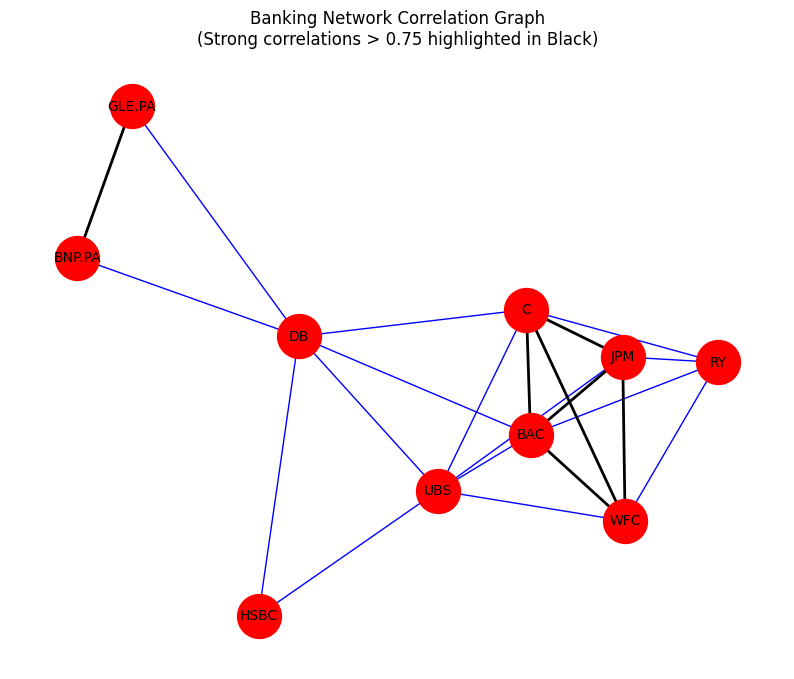

In [80]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_finance, seed=1)
#separation of edges by weight
strong_edges = [(u, v) for (u, v, d) in G_finance.edges(data=True) if d['weight'] > 0.75]
normal_edges = [(u, v) for (u, v, d) in G_finance.edges(data=True) if d['weight'] <= 0.75]
#draw nodes nd edges
nx.draw_networkx_nodes(G_finance, pos, node_color='red', node_size=1000)
nx.draw_networkx_edges(G_finance, pos, edgelist=normal_edges, edge_color='blue', width=1)
nx.draw_networkx_edges(G_finance, pos, edgelist=strong_edges, edge_color='black', width=2)
# draw labels
nx.draw_networkx_labels(G_finance, pos, font_size=10)
plt.title("Banking Network Correlation Graph\n(Strong correlations > 0.75 highlighted in Black)")
plt.axis('off')
plt.show()

In [86]:
components = list(nx.connected_components(G_finance))
print("Connected components:", components)

# Cliques
cliques = list(nx.find_cliques(G_finance))
print("Cliques:", cliques)
betweenness = nx.betweenness_centrality(G_finance)
closeness = nx.closeness_centrality(G_finance)  
eigenvector = nx.eigenvector_centrality(G_finance)
degrees = nx.degree_centrality(G_finance)
cty_df = pd.DataFrame({
    'Betweenness': betweenness,
    'Closeness': closeness,
    'Eigenvector': eigenvector,
    'Degree': degrees
})
cty_df = cty_df.sort_values(by='Betweenness', ascending=False)
cty_df
    

Connected components: [{'RY', 'BAC', 'C', 'HSBC', 'WFC', 'GLE.PA', 'BNP.PA', 'DB', 'UBS', 'JPM'}]
Cliques: [['BAC', 'C', 'DB', 'UBS'], ['BAC', 'C', 'WFC', 'JPM', 'UBS'], ['BAC', 'C', 'WFC', 'JPM', 'RY'], ['HSBC', 'DB', 'UBS'], ['GLE.PA', 'DB', 'BNP.PA']]


,Betweenness,Closeness,Eigenvector,Degree
DB,0.425926,0.750000,0.294434,0.666667
UBS,0.157407,0.750000,0.393023,0.666667
C,0.113426,0.750000,0.421673,0.666667
BAC,0.113426,0.750000,0.421673,0.666667
JPM,0.011574,0.600000,0.373697,0.555556
WFC,0.011574,0.600000,0.373697,0.555556
RY,0.000000,0.529412,0.309657,0.444444
BNP.PA,0.000000,0.473684,0.071170,0.222222
GLE.PA,0.000000,0.473684,0.071170,0.222222
HSBC,0.000000,0.529412,0.133822,0.222222


***The introduction of a correlation threshold of 0.6 as a filter for significant dependency drastically changed the structure of our graph. Initially, we had a clique where all the banks were connected to each other, which made centrality analysis quite complex because all the banks seemed to have the same importance. By applying this filter, we managed to eliminate market noise and retain only the strongest dependency relationships.***

Every bank in the following cliques [['UBS', 'HSBC', 'DB'], ['UBS', 'C', 'BAC', 'JPM', 'WFC'], ['UBS', 'C', 'BAC', 'DB'], ['BNP.PA', 'GLE.PA', 'DB'], ['RY', 'JPM', 'WFC', 'C', 'BAC']] Seems to be significantly connected with others.

***The table of centrality measures here shows that the core of the graph is mainly driven by C and BAC, which appear to be the most influential (highest eigenvector), because they are strongly connected to other banks that are themselves central, while UBS remains very central with a high eigenvector and strong closeness to the rest of the group (closeness at maximum, like C, BAC, and DB). In contrast, the bridging role is dominated by DB, which has by far the highest betweenness. This suggests that a significant portion of the shock propagation paths passes through DB. JPM and WFC remain well connected to the core (eigenvector still high) but play a minor intermediary role (low betweenness) and are a bit less close to the Graph (lower closeness). Finally, BNP.PA and GLE.PA stand out as the most peripheral (low closeness and eigenvector, zero betweenness), while RY and especially HSBC are intermediate but less structuring than the core, even if they remain exposed to shocks.***

#### Shock simulation

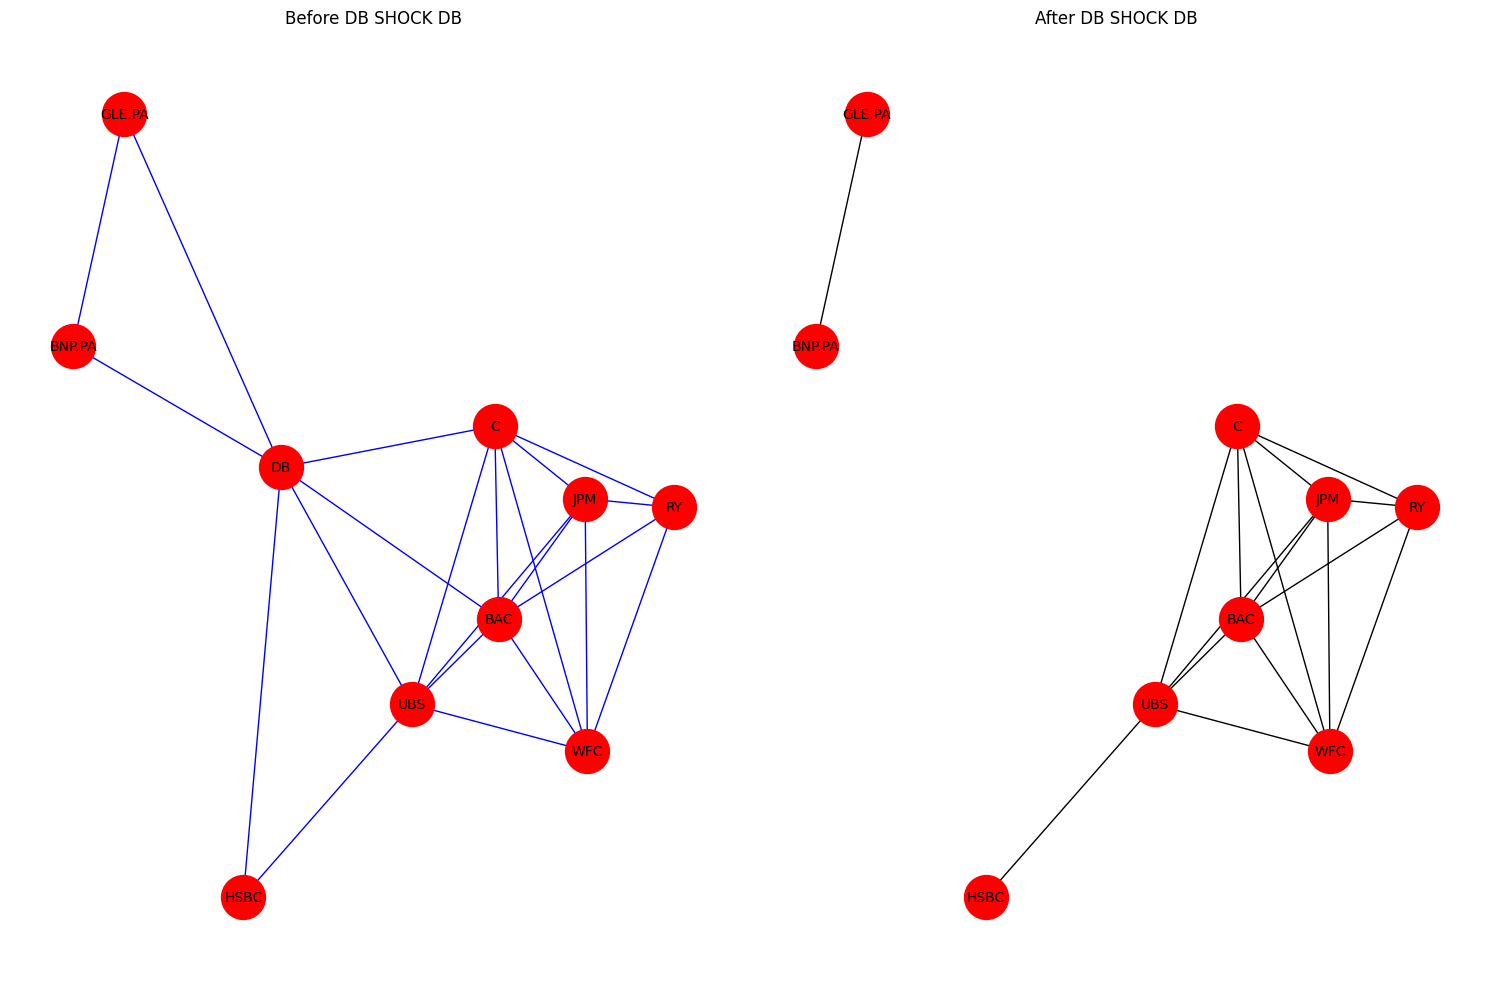

Initial number of connected components: 1
Number of connected components after: 2


In [82]:
target_bank = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[0][0] ## bank with highest betweenness

G_after_crash = G_finance.copy()
G_after_crash.remove_node(target_bank)
#number of connected components before and after
initial_components = nx.number_connected_components(G_finance)
after_components = nx.number_connected_components(G_after_crash)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
nx.draw(G_finance, pos, with_labels=True, node_color='red', edge_color='blue', node_size=1000, font_size=10)
plt.title(f"Before DB SHOCK {target_bank}")

plt.subplot(1, 2, 2)
new_pos = {n: pos[n] for n in G_after_crash.nodes()}
nx.draw(G_after_crash, new_pos, with_labels=True, node_color='red', edge_color='black', node_size=1000, font_size=10)
plt.title(f"After DB SHOCK {target_bank}")
plt.tight_layout()
plt.show()

print(f"Initial number of connected components: {initial_components}")
print(f"Number of connected components after: {after_components}")

***Before the shock, DB acts as a bridge connecting peripheral banks (BNP.PA, GLE.PA, HSBC) to the dense core (UBS, BAC, C, JPM, WFC, RY). After the shock on DB, the graph fragments, BNP.PA and GLE.PA become isolated from the core, while the core remains highly connected and HSBC is only linked to UBS.***